In [12]:
import numpy as np
from numpy import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import warnings
random.RandomState(1)
warnings.filterwarnings('ignore')

<img src="https://www.ifsc.edu.br/image/layout_set_logo?img_id=1319584&t=1602803233260" width="20%">

<center>

---
# **Introdução a Redes Neurais para Classificação**
## Implementação em Python com Pytorch
## <u>Prof. Carlos Andres Ferrero</u>
## *Instituto Federal de Santa Catarina (IFSC), Câmpus Lages*
## Grupo de Pesquisa em Análise Inteligente de Dados (IDA-IFSC)
## *Semana Nacional de Ciência e Tecnologia (SNCT/IFSC)*
---
</center>

# Oficina
- **Classificação** é uma tarefa de interesse em Aprendizado Máquina
- **Redes Neurais** é uma das técnicas de Classificação
- **Python** é uma das linguagens de programação mais usadas em aplicações e pesquisas de Aprendizado de Máquina
- **Pytorch** é uma das bibliotecas disponíveis para construir Redes Neurais, desenvolvida por *Facebook's AI Research lab*

## Partes
1. Entender o conceito de classificação e implementar um classificador simples
2. Entender o conceito de redes neurais e implementar duas redes neurais para classificação
3. Entender o conceito de redes neurais convolucionais (CNN) para classificação de imagens e implementar uma CNN

# Conceitos

## O que é Classificar?

**Classificar** consiste em **atribuir uma classe a instância de um problema**. Essa **classe** é um dos possíveis valores previamente definidos.

Exemplos:
- Classificação de **alunos** de uma turma nas classes: **aprovado** e **reprovado**.
- Classificação de seleção/recrutamento de **candidatos** para uma vaga numa empresa em: **selecionado** e **não selecionado**.
- Classificação de **imagens de pessoas** pelo uso de máscara em: **usa** e **não usa** máscara.

>*Na literatura encontramos problemas de classificação de unária (1 classe), binária (2 classes) e múlti ($L$ classes). Nesta oficina vamos tratar apenas problemas de* **classificação binária**.

## O que é um Classificador?

Um **Classificador** ou Modelo de Classificação consiste **uma função que atribui (ou prediz) uma classe a uma instância do problema**. Essas funções usam informações das instâncias, chamadas de **atributos**. 

Exemplos:
- Classificação de alunos: uma **função** pode **usar as notas** de cada aluno (atributos) para **decidir** se o mesmo está aprovado ou reprovado.
- Classificação de candidatos: uma função pode usar dados de **habilidades do candidato** (atributos) para **decidir** se o mesmo será selecionado ou não.
- Classificação de imagens de pessoas: uma função pode usar os **píxels da imagem** para **decidir** se a pessoa está usando máscara ou não.


## Qual é a forma desse Classificador?

O **Classificador** é uma função na forma $f(\textbf{x}) \rightarrow y$, onde
- $\textbf{x}$ são os valores dos atributos, $\textbf{x} = (x_1, x_2, ..., x_m)$
- $y$ é uma das possíveis classes do problema, $y \in {c_1, c_2, c_L}$

Exemplo de um **Classificador Simples**: um **professor decidiu** avaliar os alunos da seguinte forma:
  - Avaliação 1 de 0.0 a 10.0 com peso 30%
  - Avaliação 2 de 0.0 a 10.0 com peso 70%
  - Critério de aprovação: Média ponderada das avaliações maior ou igual que 6.0

Considere $\textbf{x} = (x_1, x_2)$ as avaliações 1 e 2, respectivamente, e ${c_A, c_R}$ as classes do problema, a função que classifica os alunos a partir das avaliações é:

Função que calcula a média final:
> $ media\,final(x_1, x_2) = x_1 * 0.3 + x_2 * 0.7$ 

Função que decide:
> $f(x_1, x_2) = \bigg\{ 
  \begin{array}
  & c_A \;\; se\;media\,final(x_1,x_2) \ge 6.0 \\
  c_R \;\; se\;media\,final(x_1,x_2) <  6.0 \\  
  \end{array}
  $

# Implementação de um Classificador Simples

As funções mencionadas anteriormente pode ser implementadas em Python da seguinte forma:

In [13]:
# TODO - Implementar mediafinal
def mediafinal (x1, x2):
  return x1 * 0.3 + x2 * 0.7

# TODO - Implementar modelo que decide
def model(x1, x2) :
  return 'Aprovado' if mediafinal(x1,x2) >= 6.0 else 'Reprovado'

Podemos testar a função `model()` com diferentes valores de `x1` e `x2`.

In [14]:
# TODO - Mostrar a classe de um aluno com notas 5 e 7
model(5,7)

'Aprovado'

In [15]:
# TODO - Mostrar a classe de um aluno com notas 6 e 4
model(6,4)

'Reprovado'

## Classificando Instâncias

In [16]:
# Função para gerar conjuntos de dados de alunos
def gerar_dados_alunos (n = 20):
  return pd.DataFrame({
            'x1' : random.uniform(0.0, 10.0, n).round(1),
            'x2' : random.uniform(0.0, 10.0, n).round(1)
            })

In [17]:
# TODO - Gerar conjunto de dados de alunos chamado 'instancias' e mostrar as primeiras 10 linhas
instancias = gerar_dados_alunos(n=100)
instancias.head(10)

,x1,x2
0,3.1,1.3
1,3.6,9.1
2,5.3,0.6
3,0.9,3.9
4,8.2,1.0
5,6.9,4.6
6,2.0,6.8
7,0.1,4.9
8,3.9,3.9
9,7.1,4.8


In [18]:
# TODO - Criar duas novas colunas preenchendo a média final e a classe
instancias['mediafinal'] = instancias.apply(lambda X : mediafinal(X.x1, X.x2), axis=1)
instancias['y_classe'] = instancias.apply(lambda X : model(X.x1, X.x2), axis=1)
instancias.head(10)

,x1,x2,mediafinal,y_classe
0,3.1,1.3,1.84,Reprovado
1,3.6,9.1,7.45,Aprovado
2,5.3,0.6,2.01,Reprovado
3,0.9,3.9,3.00,Reprovado
4,8.2,1.0,3.16,Reprovado
5,6.9,4.6,5.29,Reprovado
6,2.0,6.8,5.36,Reprovado
7,0.1,4.9,3.46,Reprovado
8,3.9,3.9,3.90,Reprovado
9,7.1,4.8,5.49,Reprovado


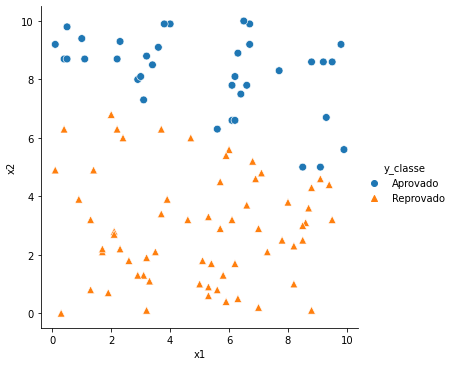

In [19]:
# Mostrando os dados graficamente
instancias['y_classe'] = pd.Categorical(instancias.y_classe)
sns.relplot(x='x1', y='x2', hue='y_classe', style = "y_classe", markers = ['o','^'], data = instancias, height=5, s=60)
plt.show()

## Visualização da Região de Decisão

In [20]:
class Model: 
  def predict(self, X) : 
    outputs = [0 if mediafinal(x[0], x[1]) >= 6.0 else 1 for x in X]
    return np.array(outputs)

X = instancias[['x1','x2']].to_numpy()
y = pd.Categorical(instancias['y_classe'])

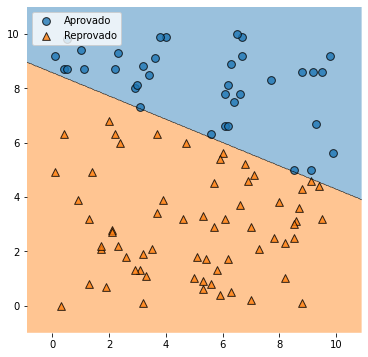

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_decision_regions(X, y.codes, clf=Model(), markers = ['o','^'], scatter_kwargs = {'s': 60} )
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, y.categories, scatterpoints=1, loc=2)
plt.show()

**Observações:**
- A região de decisão mostra a capacidade de nosso classificador de diferenciar as classes do problema, **Aprovado** e **Reprovado**.
- Neste problema a linha que divide as duas classes é uma **linha reta**, o que é uma característica de **modelos lineares**.

**Considerações:**
- Para este problema o professor já definiu a função de classificação para alunos **aprovados** e **reprovados**. 
- Em problemas do mundo real, não sabemos qual é essa função.

# Métodos de Aprendizado de Máquina (AM) para Classificação

Os métodos de AM são usados para encontrar/aprender um (bom) classificador, isto é uma função, a partir dos dados que temos sobre o problema. E esse processo é chamado de **indução do modelo**.

Os principais métodos usados são:
- Regressão Logística
- *Linear Discriminant Analysis* (LDA)
- *Support Vector Machines* (SVM)
- *Decision Trees* e *Random Forest*
- *Nearest Neighbors (kNN) based* 
- **Redes Neurais**
